Note: This notebook is an alternative to [this article](https://rpubs.com/tomytjandra/PCA-reduce-multicollinearity) for PCA with the Python programming language.

# PCA to Reduce Multicollinearity

## Libraries 

In [72]:
import numpy as np # data processing
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import statsmodels.api as sm # modelling
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.decomposition import PCA # pca
import plotly.io as pio # render ploty
pio.renderers.default='notebook_connected'

## Business Question

- **Objective**: Create a regression model to predict crime rates.
- **PCA function**: Fulfillment of the assumption of no multicollinearity between predictors.

> Note: in the following example, train-test splitting is not performed. In reality, PCA is only carried out on train data; then, the test data will be transformed using eigenvectors learned from the train data.

## Read Data 

Crime data is socio-economic data from 47 US states in 1960. The values of the variables appear to have been scaled.


In [73]:
crime = pd.read_csv("data_input/crime.csv", index_col=0)

crime.columns = ['percent_m', 'is_south', 'mean_education', 
                 'police_exp60', 'police_exp59', 'labour_participation',
                 'm_per1000f', 'state_pop', 'nonwhites_per1000', 'unemploy_m24',
                 'unemploy_m39', 'gdp', 'inequality', 'prob_prison', 'time_prison',  
                 'crime_rate']

crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


**Data Description :**

- `percent_m`: percentage of males aged 14-24
- `is_south`: whether it is in a Southern state. 1 for Yes, 0 for No.  
- `mean_education`: mean years of schooling  
- `police_exp60`: police expenditure in 1960  
- `police_exp59`: police expenditure in 1959
- `labour_participation`: labour force participation rate  
- `m_per1000f`: number of males per 1000 females  
- `state_pop`: state population  
- `nonwhites_per1000`: number of non-whites resident per 1000 people  
- `unemploy_m24`: unemployment rate of urban males aged 14-24  
- `unemploy_m39`: unemployment rate of urban males aged 35-39  
- `gdp`: gross domestic product per head  
- `inequality`: income inequality  
- `prob_prison`: probability of imprisonment  
- `time_prison`: avg time served in prisons  
- `crime_rate`: crime rate in an unspecified category

## Exploratory Data Analysis

Check the correlation between numerical columns.

In [74]:
crime.corr()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
percent_m,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
is_south,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
mean_education,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
police_exp60,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
police_exp59,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
labour_participation,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
m_per1000f,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
state_pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
nonwhites_per1000,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
unemploy_m24,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


In [75]:
import plotly.express as px

# Mask to matrix
z = crime.corr().round(2).to_numpy() # mengubah dataframe ke matrix (list of lists)
fig = px.imshow(z, 
                x=pd.unique(crime.corr().columns.to_frame()[0]), # ambil nama index dari multiindex dataframe not sorted
                y=pd.unique(crime.corr().columns.to_frame()[0]),
                color_continuous_scale='Reds',
                text_auto=True) # memperlihatkan nilai korelasi dalam kotak heatmap

fig.update_traces(hoverinfo='none', hovertemplate=None) # disable hover text

# plotly figure layout
fig.update_layout(title = 'Correlation Heatmap', 
                  title_x = 0.5, # posisi title
                  width=1000, height=1000)


fig.show()

> There is a fairly strong correlation between predictors (apart from the crime_rate column, which will be the target column), especially in police_exp59 and police_exp60.

## Data Pre-processing: Scalling 

Normalize the `crime` dataframe so that each predictor has the same scale. Using Z-score standardization for scaling numeric datasets with the [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) function in the sklearn library:

In [76]:
crime.head(3)

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578


In [77]:
crime_scaled = StandardScaler().fit_transform(crime.drop(columns='crime_rate').values)

## Data Pre-processing: PCA 

Principal Component Analysis using the [sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) only on the predictor column.

In [78]:
# inisialisasi objek PCA
pca = PCA(svd_solver='full') # implementasi full svd sehingga mendapatkan semua PC yang terbentuk
            

pca.fit(crime_scaled) # menghitung PCA

PCA(svd_solver='full')

In [79]:
# displays the number of PCs formed
pca.n_components_

15

See the proportion of information values that can be captured for each PC with the `explained_variance_ratio_` attribute:

In [80]:
pca.explained_variance_ratio_

array([4.01263510e-01, 1.86789802e-01, 1.33662956e-01, 7.74805200e-02,
       6.38865981e-02, 3.68795933e-02, 2.14545791e-02, 2.04934180e-02,
       1.56770195e-02, 1.33253954e-02, 1.17123602e-02, 8.54600716e-03,
       4.62277942e-03, 3.89785100e-03, 3.07610984e-04])

View the cumulative proportion of information value that can be captured for each additional PC:

In [81]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 40.13,  58.81,  72.18,  79.93,  86.32,  90.01,  92.16,  94.21,
        95.78,  97.11,  98.28,  99.13,  99.59,  99.98, 100.01])

Visualization of explained variance using the [plotly library](https://plotly.com/python/pca-visualization/#plotting-explained-variance)

In [82]:
exp_var_cumul = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Jumlah Components", "y": "Explained Variance"}
)

In [83]:
crime_pca = pd.DataFrame(pca.transform(crime_scaled), 
                          columns=pca.get_feature_names_out())
crime_pca.index = crime_pca.index + 1 # to match sm.OLS() input index
crime_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
1,4.244683,1.105657,1.131172,0.679044,-0.055881,-0.310661,0.572532,0.007886,-0.225926,-0.457638,0.085662,-0.223355,0.113834,0.330500,0.023637
2,-1.185341,-0.684333,0.053013,-0.084410,1.185883,0.589543,-0.197726,-0.156238,-0.441499,-0.214379,0.034283,-0.360723,-0.300733,0.255085,-0.061421
3,4.218847,-0.279767,0.375088,0.382026,-0.547198,-0.726492,-0.104424,-0.354935,-0.063673,0.067917,0.486697,0.047528,-0.052724,-0.491811,0.042573
4,-3.876422,2.604765,-0.230404,0.386760,1.662528,-0.737375,-0.269882,1.564191,0.383645,-0.231701,-0.111037,-0.179188,-0.089337,0.151297,0.029490
5,-1.859185,-1.345375,-1.292654,0.725907,-0.042040,0.398351,-0.071270,0.549110,-0.227061,-0.482855,0.333145,-0.422595,0.729960,0.132444,-0.075962


## Modelling 

Compare the two models:

- `model_ori`: Model using all predictor variables from initial crime data
- `model_pca`: Model using all PCs as predictors

### `model_ori`

In [84]:
Y = crime.crime_rate
X = sm.add_constant(crime.drop('crime_rate', axis=1))

model_ori = sm.OLS(Y, X).fit()
print(model_ori.summary())

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8.429
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           3.54e-07
Time:                        00:36:16   Log-Likelihood:                -308.01
No. Observations:                  47   AIC:                             648.0
Df Residuals:                      31   BIC:                             677.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5984.2876 

> Each Estimate value displayed can be interpreted because it represents the original value.

### `model_pca`

In [85]:
Y = crime.crime_rate
X = sm.add_constant(crime_pca)

model_pca = sm.OLS(Y, X).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8.429
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           3.54e-07
Time:                        00:36:16   Log-Likelihood:                -308.01
No. Observations:                  47   AIC:                             648.0
Df Residuals:                      31   BIC:                             677.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        905.0851     30.495     29.680      0.0

> Each Estimate value displayed cannot be interpreted because the PC value is the original data value which has been mixed with a certain formula (using an eigen vector).

## Prediction

This is only to have model evaluation

In [86]:
pred_model_ori = model_ori.fittedvalues 

pred_model_pca = model_pca.fittedvalues

prediction = pd.DataFrame({
    'actual': crime.crime_rate,
    'pred_model_ori': pred_model_ori, 
    'pred_model_pca': pred_model_pca 
})
prediction.head()

,actual,pred_model_ori,pred_model_pca
1,791,755.032216,755.032216
2,1635,1473.676401,1473.676401
3,578,322.261528,322.261528
4,1969,1791.361871,1791.361871
5,1234,1166.684019,1166.684019


## Model Evaluation

In [87]:
print('Adjusted R-Squared model_ori linear regression: ',(model_ori.rsquared_adj).round(4)) # single linear regression
print('Adjusted R-Squared model_pca linear regression: ',(model_pca.rsquared_adj).round(4)) # multile linear regression

Adjusted R-Squared model_ori linear regression:  0.7078
Adjusted R-Squared model_pca linear regression:  0.7078


In [88]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs

rmse_multiple1 = rmse(prediction['actual'], prediction['pred_model_ori'])
rmse_multiple2 = rmse(prediction['actual'], prediction['pred_model_pca'])
mae_multiple1 = meanabs(prediction['actual'], prediction['pred_model_ori'])
mae_multiple2 = meanabs(prediction['actual'], prediction['pred_model_pca'])

In [89]:
pd.DataFrame({
    'model': ['model_ori', 'model_pca'],
    'rmse': [rmse_multiple1, rmse_multiple2],
    'mae': [mae_multiple1, mae_multiple2]
})

,model,rmse,mae
0,model_ori,169.789969,129.915213
1,model_pca,169.789969,129.915213


> The performance of the `model_ori` and `model_pca` models is exactly the same. This is because in `model_pca`, we use all the information in the initial crime data, so the results are the same.

## Assumption Checking

Linear model assumptions so that it can be said to be the Best Linear Unbiased Estimate:

- Linearity of Predictors
- Normality of Residuals
- Homoscedasticity of Residuals
- No multicollinearity

### Linearity of Predictors

Done before making the model. To test whether the target and predictor variables have a linear relationship.

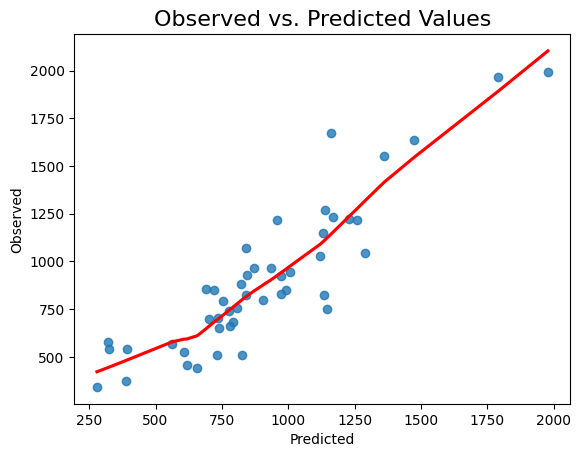

In [90]:
# fungsi dari helper
from helper import linearity_test
linearity_test(model_ori, Y)

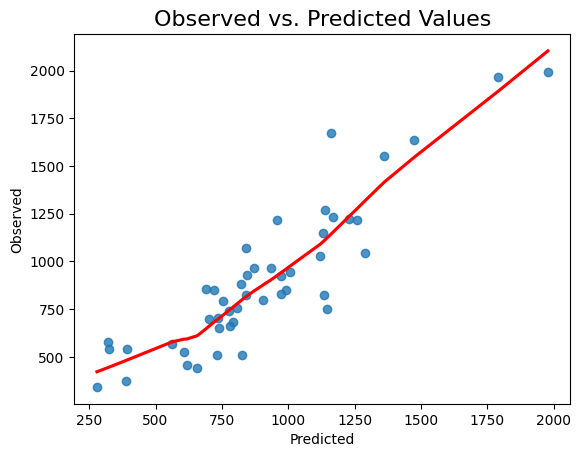

In [91]:
linearity_test(model_pca, Y)

### Normality of Residuals

In [92]:
from scipy.stats import shapiro

name = {0 : 'Statistics',
       1: 'p-value'}

pd.DataFrame({shapiro(model_ori.resid)}).rename(columns = name)

,statistic,pvalue
0,0.9846,0.784875


In [93]:
from scipy.stats import shapiro

name = {0 : 'Statistics',
       1: 'p-value'}

pd.DataFrame({shapiro(model_pca.resid)}).rename(columns = name)

,statistic,pvalue
0,0.9846,0.784875


> p-value is 0.088 > alpha (0.05) $\rightarrow$ Fail to reject $H_0$ / Accept $H_0$ $\rightarrow$ The residuals are normally distributed.

### Homoscedacity of Residuals 

In [94]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistics', 'p-value', 'f-value', 'f p-value']

test = sms.het_breuschpagan(model_ori.resid, model_ori.model.exog)
lzip(name, test)

[('Lagrange multiplier statistics', 18.46875867941494),
 ('p-value', 0.23882360158752458),
 ('f-value', 1.3377885493513066),
 ('f p-value', 0.2392611275584389)]

In [95]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistics', 'p-value', 'f-value', 'f p-value']

test = sms.het_breuschpagan(model_pca.resid, model_pca.model.exog)
lzip(name, test)

[('Lagrange multiplier statistics', 18.468758679414414),
 ('p-value', 0.23882360158755017),
 ('f-value', 1.3377885493512438),
 ('f p-value', 0.23926112755847234)]

> p-value > alpha: residual or error is constant or does not form a particular pattern.

### No Multicolinearity 

The hope is that in the linear regression model, multicollinearity will not occur. Multicollinearity occurs when the predictor variables used in the model have a strong relationship, whether or not multicollinearity can be seen from the VIF (Variance Inflation Factor) value.

VIF formula:

$$VIF = \frac{1}{1-R^2_i}$$

where $R^2$ is the r-squared value for each predictor $i$. VIF has a value range from 1 to infinity. **The greater the VIF value, the greater the indication of multicollinearity**. Some researchers say that to determine the presence of multicollinearity, VIF is divided into the following values:
- 1 = no correlation between predictors
- between 1 and 5 = the correlation is moderate
- Greater than 5 = strongest correlation between predictors
- Usually a VIF greater than 10 indicates that the predictor variables are very strongly correlated.

When the VIF value is more than 10, it means that multicollinearity occurs. the hope is to get a VIF < 10

> Documentation of the [variance_inflation_factor](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html) function in statsmodel.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

x = crime.drop(columns = 'crime_rate')

xc = sm.add_constant(x)
vif = [vif(xc.values, i) for i in range(len(xc.columns))]
pd.Series(data=vif, index = xc.columns).sort_values(ascending=False)

const                   2851.125173
police_exp59             113.559262
police_exp60             104.658667
gdp                       10.530375
inequality                 8.644528
unemploy_m24               6.063931
is_south                   5.342783
unemploy_m39               5.088880
mean_education             5.077447
nonwhites_per1000          4.674088
m_per1000f                 3.785934
labour_participation       3.712690
percent_m                  2.892448
prob_prison                2.809459
time_prison                2.713785
state_pop                  2.536708
dtype: float64

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

x = crime_pca

xc = sm.add_constant(x)
vif = [vif(xc.values, i) for i in range(len(xc.columns))]
pd.Series(data=vif, index = xc.columns).sort_values(ascending=False)

pca0     1.0
pca2     1.0
pca3     1.0
pca6     1.0
pca11    1.0
const    1.0
pca1     1.0
pca5     1.0
pca8     1.0
pca9     1.0
pca10    1.0
pca14    1.0
pca4     1.0
pca7     1.0
pca12    1.0
pca13    1.0
dtype: float64

In `model_pca`, the assumption of no multicollinearity is fulfilled. A VIF value of 1 indicates that all PCs used have no correlation at all.

## Conclusion 

The PCA method can overcome multicollinearity problems in linear models. However, the linear regression model loses interpretability, because the PC values are mixed.